#### Adding import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#make necesarry imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager

In /Users/azadesanjari/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/azadesanjari/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/azadesanjari/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/azadesanjari/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/azadesanjari/anaconda3

#### Reading the data

In [2]:
books = pd.read_csv('data/books.csv', sep=',', encoding = 'ISO-8859-1')

In [3]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
book_tags = pd.read_csv('data/book_tags.csv', sep=',', encoding = 'ISO-8859-1')

In [5]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [6]:
ratings = pd.read_csv('data/ratings.csv', sep=',', encoding = 'ISO-8859-1')

In [7]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [8]:
tags = pd.read_csv('data/tags.csv', sep=',', encoding = 'ISO-8859-1')

In [9]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [10]:
to_read = pd.read_csv('data/to_read.csv', sep=',', encoding = 'ISO-8859-1')

In [11]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [12]:
print(books.shape)
books.info()

(10000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 no

In [13]:
print(book_tags.shape)
book_tags.info()

(999912, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [14]:
print(ratings.shape)
ratings.info()

(5976479, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [15]:
print(tags.shape)
tags.info()

(34252, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [16]:
print(to_read.shape)
to_read.info()

(912705, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


#### Distribution of ratings

In [17]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [18]:
ratings['rating'].min(), ratings['rating'].max()

(1, 5)

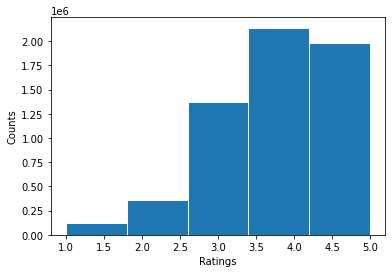

In [19]:
_ = plt.hist(ratings['rating'], bins=5, edgecolor='white')
_ = plt.xlabel('Ratings')
_ = plt.ylabel('Counts')

In [20]:
ratings['user_id'].nunique(), ratings['user_id'].count() #5976479

(53424, 5976479)

#### Books

In [21]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [22]:
books['ratings_count'].min(), books['ratings_count'].max()

(2716, 4780653)

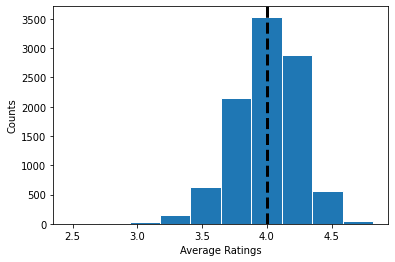

In [23]:
_ = plt.hist(books['average_rating'], bins=10, edgecolor='white')
_ = plt.axvline(x=np.mean(books.average_rating), linewidth = 3, linestyle = '--', color = 'black')
_ = plt.xlabel('Average Ratings')
_ = plt.ylabel('Counts')
plt.show()

In [24]:
high_rate_books = books.sort_values(by=['average_rating'], ascending=False)

In [25]:
high_rate_books_1000 = high_rate_books.iloc[0:999, :]

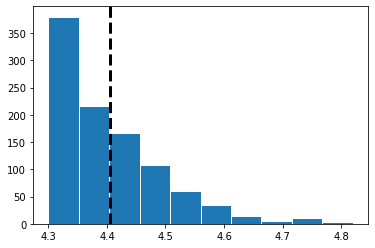

In [26]:
_= plt.hist(high_rate_books_1000['average_rating'], bins=10, edgecolor='white')
_ = plt.axvline(x=np.mean(high_rate_books_1000['average_rating']), linewidth = 3, linestyle = '--', color = 'black')
plt.show()

In [27]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [28]:
languages = books.groupby('language_code').count()

In [29]:
languages

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
language_code,,,,,,,,,,,,,,,,,,,,,
ara,64,64,64,64,64,11,34,64,63,58,...,64,64,64,64,64,64,64,64,64,64
dan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
en,4,4,4,4,4,0,0,4,4,2,...,4,4,4,4,4,4,4,4,4,4
en-CA,58,58,58,58,58,53,53,58,58,53,...,58,58,58,58,58,58,58,58,58,58
en-GB,257,257,257,257,257,225,225,257,257,231,...,257,257,257,257,257,257,257,257,257,257
en-US,2070,2070,2070,2070,2070,2033,2034,2070,2065,1965,...,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070
eng,6341,6341,6341,6341,6341,5831,5906,6341,6331,5983,...,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341
fil,2,2,2,2,2,1,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
fre,25,25,25,25,25,24,24,25,25,23,...,25,25,25,25,25,25,25,25,25,25


In [30]:
top_languages = languages.sort_values(by=['books_count'], ascending=False).iloc[0:10]

In [31]:
top_languages

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
language_code,,,,,,,,,,,,,,,,,,,,,
eng,6341,6341,6341,6341,6341,5831,5906,6341,6331,5983,...,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341
en-US,2070,2070,2070,2070,2070,2033,2034,2070,2065,1965,...,2070,2070,2070,2070,2070,2070,2070,2070,2070,2070
en-GB,257,257,257,257,257,225,225,257,257,231,...,257,257,257,257,257,257,257,257,257,257
ara,64,64,64,64,64,11,34,64,63,58,...,64,64,64,64,64,64,64,64,64,64
en-CA,58,58,58,58,58,53,53,58,58,53,...,58,58,58,58,58,58,58,58,58,58
fre,25,25,25,25,25,24,24,25,25,23,...,25,25,25,25,25,25,25,25,25,25
ind,21,21,21,21,21,12,16,21,21,21,...,21,21,21,21,21,21,21,21,21,21
spa,20,20,20,20,20,19,19,20,20,20,...,20,20,20,20,20,20,20,20,20,20
ger,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


#### Which authors wrote the most books?

In [32]:
authors = books.groupby('authors').head(10)

In [33]:
top_10_authors = authors.sort_values('books_count', ascending=False).iloc[0:9]

In [34]:
top_10_authors

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
1724,1725,6324090,6324090,55548884,3296,NaN,NaN,"Lewis Carroll, John Tenniel",1865.0,NaN,...,30426,85031,5047,1724,4863,18094,27848,32502,https://images.gr-assets.com/books/1391204048m...,https://images.gr-assets.com/books/1391204048s...
70,71,18490,18490,4836639,2618,141439475,9.780141e+12,"Mary Wollstonecraft Shelley, Percy Bysshe Shel...",1818.0,"Frankenstein; or, The Modern Prometheus",...,808589,883563,19993,29366,74142,231022,300495,248538,https://images.gr-assets.com/books/1381512375m...,https://images.gr-assets.com/books/1381512375s...
292,293,295,295,3077988,2573,753453800,9.780753e+12,Robert Louis Stevenson,1882.0,Treasure Island,...,268012,310515,7917,5349,19127,86487,114968,84584,https://images.gr-assets.com/books/1485248909m...,https://images.gr-assets.com/books/1485248909s...
42,43,10210,10210,2977639,2568,142437204,9.780142e+12,"Charlotte BrontÃ«, Michael Mason",1847.0,Jane Eyre,...,1198557,1286135,31212,35132,64274,212294,400214,574221,https://images.gr-assets.com/books/1327867269m...,https://images.gr-assets.com/books/1327867269s...
62,63,6185,6185,1565818,2498,393978893,9.780394e+12,"Emily BrontÃ«, Richard J. Dunn",1847.0,Wuthering Heights,...,899195,1001135,26157,46469,84084,215320,309180,346082,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
115,116,24583,24583,41326609,2448,143039563,9.780143e+12,"Mark Twain, Guy Cardwell, John Seelye",1876.0,The Adventures of Tom Sawyer,...,555359,594226,7165,12130,34349,143659,217896,186192,https://images.gr-assets.com/books/1404811979m...,https://images.gr-assets.com/books/1404811979s...
203,204,5326,5326,3097440,2380,1561797464,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,...,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
94,95,5297,5297,1858012,2303,375751513,9.780376e+12,"Oscar Wilde, Jeffrey Eugenides",1891.0,The Picture of Dorian Gray,...,590014,674551,19647,9825,30735,129420,246892,257679,https://images.gr-assets.com/books/1424596966m...,https://images.gr-assets.com/books/1424596966s...


<BarContainer object of 9 artists>

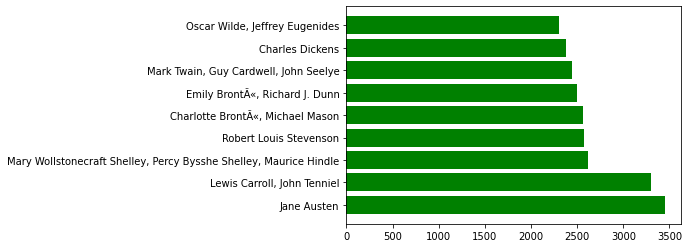

In [36]:
plt.barh(top_10_authors['authors'], top_10_authors['books_count'], color= 'green')

#### Who are the top 10 highly rated and the bottom 10 poorly rated authors?

### Popularity based recommendation system

In [37]:
# based on counting of 'ratings_count' for different books

In [38]:
ratings_popularity = books.sort_values('ratings_count', ascending=False).head(10)

In [39]:
ratings_popularity[['title','authors','ratings_count','isbn','original_publication_year']]

,title,authors,ratings_count,isbn,original_publication_year
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4780653,439023483,2008.0
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPrÃ©",4602479,439554934,1997.0
2,"Twilight (Twilight, #1)",Stephenie Meyer,3866839,316015849,2005.0
3,To Kill a Mockingbird,Harper Lee,3198671,61120081,1960.0
4,The Great Gatsby,F. Scott Fitzgerald,2683664,743273567,1925.0
5,The Fault in Our Stars,John Green,2346404,525478817,2012.0
6,The Hobbit,J.R.R. Tolkien,2071616,618260307,1937.0
7,The Catcher in the Rye,J.D. Salinger,2044241,316769177,1951.0
9,Pride and Prejudice,Jane Austen,2035490,679783261,1813.0
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2001311,1416524797,2000.0


<BarContainer object of 10 artists>

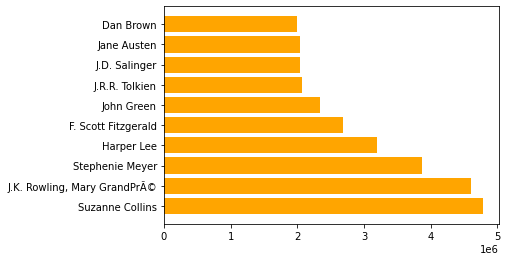

In [40]:
plt.barh(ratings_popularity['authors'], ratings_popularity['ratings_count'], color= 'orange')

In [41]:
# based on average rating for each book

In [42]:
high_rate_books = books.sort_values('average_rating', ascending=False).head(10)

In [43]:
high_rate_books[['title','authors','average_rating','isbn','original_publication_year']]

,title,authors,average_rating,isbn,original_publication_year
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,2005.0
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPrÃ©",4.77,439682584,2003.0
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,765326361,2014.0
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,842339523,1993.0
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76,1433502410,2002.0
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,836221362,1996.0
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,836213122,1996.0
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,545044251,1998.0
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,439827604,2005.0
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,751500283,1992.0


<BarContainer object of 10 artists>

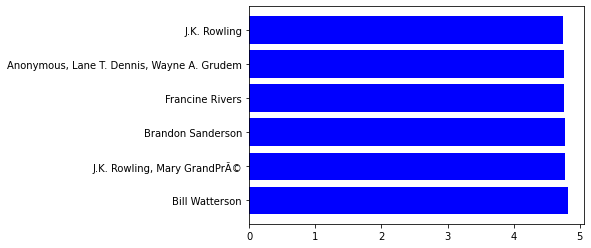

In [45]:
plt.barh(high_rate_books['authors'], high_rate_books['average_rating'], color= 'blue')

### Collaborative filtering recommendation system

In [46]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [47]:
counts = ratings['user_id'].value_counts()
ratings['counts'] = counts

In [48]:
ratings.tail(10)

,user_id,book_id,rating,counts
5976469,21879,6720,5,NaN
5976470,10596,1786,4,NaN
5976471,50229,8137,2,NaN
5976472,23863,8020,4,NaN
5976473,49925,330,5,NaN
5976474,49925,510,5,NaN
5976475,49925,528,4,NaN
5976476,49925,722,4,NaN
5976477,49925,949,5,NaN
5976478,49925,1023,4,NaN


In [49]:
ratings_100 = ratings[ratings['counts'] > 100]

In [50]:
ratings_100.head()

,user_id,book_id,rating,counts
1,2,4081,4,117.0
4,2,2318,3,134.0
7,2,33,4,155.0
9,2,2686,5,132.0
10,2,3753,5,128.0


In [51]:
ratings_100.shape

(36199, 4)

In [52]:
# Collaborative Filtering: generating user-item ratings matrix from the ratings table

In [53]:
ratings_matrix = ratings_100.pivot(index='user_id', columns='book_id', values='rating')
user_id = ratings_matrix.index
book_id = ratings_matrix.columns

In [54]:
ratings_matrix.head()

book_id,2,3,4,5,7,8,9,10,11,13,...,9972,9974,9978,9981,9988,9990,9991,9995,9998,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
ratings_matrix = ratings_matrix.fillna(0)


In [56]:
ratings_matrix.shape

(1046, 3994)

### User-based Collaborative Filtering

In [68]:
def findksimilarusers(user_id, ratings, metric, k): # metric='cosine'
    similarities=[]
    indicies=[]
    model_knn = NearestNeighbors(metric=metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    loc = ratings.index.get_loc(user_id)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1,-1), n_neighbors = k+1)
    similarities = 1 - distances.flatten()
    
    """
    print('{0} most similar users for User {1}:\n'.format(k,user_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;

        else:
            print('{0}: User {1}, with similarity of {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
    """
            
    return similarities,indices

In [58]:
similarities,indices = findksimilarusers(752,ratings_matrix, metric='cosine', k=20)

20 most similar users for User 752:

0: User 465, with similarity of 0.9999999999999998
1: User 81, with similarity of 0.22645540682891907
2: User 738, with similarity of 0.1698415551216894
3: User 583, with similarity of 0.1698415551216894
4: User 820, with similarity of 0.16012815380508716
5: User 606, with similarity of 0.14492271358453535
6: User 370, with similarity of 0.1366204903044954
7: User 746, with similarity of 0.12867440930765928
8: User 1024, with similarity of 0.1238413833655152
9: User 1004, with similarity of 0.12287685874807996
10: User 770, with similarity of 0.11717017004806152
11: User 104, with similarity of 0.11529281650576628
12: User 170, with similarity of 0.11322770341445954
13: User 643, with similarity of 0.11145078533979247
14: User 401, with similarity of 0.10875205500825669
15: User 621, with similarity of 0.10615097195105583
16: User 253, with similarity of 0.10456739115301794
17: User 824, with similarity of 0.0976303587571089
18: User 717, with simil

In [59]:
similarities,indices = findksimilarusers(542,ratings_matrix, metric='correlation', k=20)

20 most similar users for User 542:

0: User 338, with similarity of 1.0
1: User 307, with similarity of 0.22682250927076264
2: User 499, with similarity of 0.2071563614769083
3: User 671, with similarity of 0.2063324068833644
4: User 554, with similarity of 0.2050977174675913
5: User 52, with similarity of 0.20002714287258994
6: User 967, with similarity of 0.19954078591586955
7: User 838, with similarity of 0.1896051065026384
8: User 462, with similarity of 0.1737181572770845
9: User 561, with similarity of 0.17217195532927143
10: User 446, with similarity of 0.16986816839736685
11: User 984, with similarity of 0.1671480884517701
12: User 325, with similarity of 0.16713310951238713
13: User 598, with similarity of 0.1647296264864706
14: User 627, with similarity of 0.15890667060768893
15: User 633, with similarity of 0.15840532297895638
16: User 964, with similarity of 0.15708824717116987
17: User 341, with similarity of 0.1553350687954943
18: User 116, with similarity of 0.153843381

In [60]:
similarities,indices = findksimilarusers(542,ratings_matrix, metric='cosine', k=20)

20 most similar users for User 542:

0: User 338, with similarity of 1.0
1: User 307, with similarity of 0.23908841106955458
2: User 671, with similarity of 0.2188506703164137
3: User 554, with similarity of 0.21684692670175243
4: User 499, with similarity of 0.21378157141362952
5: User 967, with similarity of 0.20950324553822275
6: User 52, with similarity of 0.20870743975979833
7: User 838, with similarity of 0.19612716374132155
8: User 462, with similarity of 0.1854504369615788
9: User 446, with similarity of 0.18269493500769696
10: User 561, with similarity of 0.18132395389296696
11: User 598, with similarity of 0.17577668427253013
12: User 633, with similarity of 0.1738826833356507
13: User 325, with similarity of 0.17254766675720645
14: User 627, with similarity of 0.17133455011201115
15: User 984, with similarity of 0.1707829080972567
16: User 964, with similarity of 0.16912915283765073
17: User 860, with similarity of 0.16717750643594687
18: User 341, with similarity of 0.16581

In [61]:
#The function predict_userbased predicts rating for specified user-item combination based on user-based approach

In [62]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, book_id, ratings, metric, k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(book_id)
    
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
                continue;
        else:
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    #print('\nPredicted rating for user {0} and item {1} is {2}'.format(user_id,book_id,prediction))

    return prediction

In [63]:
predict_userbased(542,4, ratings_matrix, metric='cosine', k=20)

20 most similar users for User 542:

0: User 338, with similarity of 1.0
1: User 307, with similarity of 0.23908841106955458
2: User 671, with similarity of 0.2188506703164137
3: User 554, with similarity of 0.21684692670175243
4: User 499, with similarity of 0.21378157141362952
5: User 967, with similarity of 0.20950324553822275
6: User 52, with similarity of 0.20870743975979833
7: User 838, with similarity of 0.19612716374132155
8: User 462, with similarity of 0.1854504369615788
9: User 446, with similarity of 0.18269493500769696
10: User 561, with similarity of 0.18132395389296696
11: User 598, with similarity of 0.17577668427253013
12: User 633, with similarity of 0.1738826833356507
13: User 325, with similarity of 0.17254766675720645
14: User 627, with similarity of 0.17133455011201115
15: User 984, with similarity of 0.1707829080972567
16: User 964, with similarity of 0.16912915283765073
17: User 860, with similarity of 0.16717750643594687
18: User 341, with similarity of 0.16581

2

### Item-based Recommendation Systems

In [69]:
#This function finds k similar items given the item_id and ratings matrix M

def findksimilaritems(book_id, ratings, metric, k):
    similarities=[]
    indices=[]    
    ratings=ratings.T
    
    loc = ratings.index.get_loc(book_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    
    """
    print('{0} most similar items for item {1}:\n'.format(k,book_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == book_id:
            continue;

        else:
            print('{0}: Item {1} :, with similarity of {2}'.format(i,indices.flatten()[i]+1, similarities.flatten()[i]))

    """
    return similarities,indices

In [65]:
similarities,indices= findksimilaritems(3, ratings_matrix, metric='cosine', k=20)

20 most similar items for item 3:

0: Item 2 :, with similarity of 1.0
1: Item 39 :, with similarity of 0.5189543915195762
2: Item 2326 :, with similarity of 0.46423834544262976
3: Item 1836 :, with similarity of 0.46423834544262976
4: Item 2119 :, with similarity of 0.46423834544262976
5: Item 662 :, with similarity of 0.46423834544262976
6: Item 2234 :, with similarity of 0.39808109706155126
7: Item 1070 :, with similarity of 0.3448275862068966
8: Item 1162 :, with similarity of 0.3406578127066664
9: Item 1519 :, with similarity of 0.32417635938924316
10: Item 414 :, with similarity of 0.31126178291076934
11: Item 2912 :, with similarity of 0.297112541083283
12: Item 3540 :, with similarity of 0.297112541083283
13: Item 420 :, with similarity of 0.28571895055155894
14: Item 402 :, with similarity of 0.2680281337094488
15: Item 348 :, with similarity of 0.26083451583236883
16: Item 1195 :, with similarity of 0.2459594839716409
17: Item 1036 :, with similarity of 0.2344757729637903
18:

In [73]:
#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, book_id, ratings, metric, k):
    prediction= wtd_sum =0
    
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(book_id)
    
    similarities, indices=findksimilaritems(book_id, ratings, metric, k) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == book_id:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                                  
    prediction = int(round(wtd_sum/sum_wt))
    #print('\nPredicted rating for user {0}, item {1}: {2}'.format(user_id,book_id,prediction))      

    return prediction


In [67]:
predict_itembased(1,3, ratings_matrix, metric='cosine', k=20)

20 most similar items for item 3:

0: Item 2 :, with similarity of 1.0
1: Item 39 :, with similarity of 0.5189543915195762
2: Item 2326 :, with similarity of 0.46423834544262976
3: Item 1836 :, with similarity of 0.46423834544262976
4: Item 2119 :, with similarity of 0.46423834544262976
5: Item 662 :, with similarity of 0.46423834544262976
6: Item 2234 :, with similarity of 0.39808109706155126
7: Item 1070 :, with similarity of 0.3448275862068966
8: Item 1162 :, with similarity of 0.3406578127066664
9: Item 1519 :, with similarity of 0.32417635938924316
10: Item 414 :, with similarity of 0.31126178291076934
11: Item 2912 :, with similarity of 0.297112541083283
12: Item 3540 :, with similarity of 0.297112541083283
13: Item 420 :, with similarity of 0.28571895055155894
14: Item 402 :, with similarity of 0.2680281337094488
15: Item 348 :, with similarity of 0.26083451583236883
16: Item 1195 :, with similarity of 0.2459594839716409
17: Item 1036 :, with similarity of 0.2344757729637903
18:

0

### Recommendation

In [74]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric):    
    
    prediction = []
    if (method == 'Item-based (correlation)') or (method == 'Item-based (cosine)'):
        for i in range(ratings.shape[1]):
            if (ratings[ratings.columns[i]][user_id] !=0): #not rated already
                prediction.append(predict_itembased(user_id, ratings.columns[i] ,ratings, metric, k))
            else:                    
                prediction.append(-1) #for already rated items
    else:
        for i in range(ratings.shape[1]):
            if (ratings[ratings.columns[i]][user_id] !=0): #not rated already
                prediction.append(predict_userbased(user_id, ratings.columns[i] ,ratings, metric, k))
            else:                    
                prediction.append(-1) #for already rated items
    prediction = pd.Series(prediction)
    prediction = prediction.sort_values(ascending=False)
    recommended = prediction[:10]
    print("With {0} approach, Following books are recommended...".format(method))
    covers = []
    for i in range(len(recommended)):
        print("{0}. {1}".format(i+1,books.title[recommended.index[i]]))
        covers.append(books.small_image_url[recommended.index[i]])
    return recommended, covers

In [ ]:
#rating for an item is greater than or equal to 6, and the items has not been rated already
def recommendItem(user_id, item_id, ratings):
    
    if user_id<1 or user_id>6 or type(user_id) is not int:
        print 'Userid does not exist. Enter numbers from 1-6'
    else:    
        ids = ['User-based CF (cosine)','User-based CF (correlation)','Item-based CF (cosine)',
               'Item-based CF (adjusted cosine)']

        approach = widgets.Dropdown(options=ids, value=ids[0],
                               description='Select Approach', width='500px')
        
        def on_change(change):
            prediction = 0
            clear_output(wait=True)
            if change['type'] == 'change' and change['name'] == 'value':            
                if (approach.value == 'User-based CF (cosine)'):
                    metric = 'cosine'
                    prediction = predict_userbased(user_id, item_id, ratings, metric)
                elif (approach.value == 'User-based CF (correlation)')  :                       
                    metric = 'correlation'               
                    prediction = predict_userbased(user_id, item_id, ratings, metric)
                elif (approach.value == 'Item-based CF (cosine)'):
                    prediction = predict_itembased(user_id, item_id, ratings)
                else:
                    prediction = predict_itembased_adjcos(user_id,item_id,ratings)

                if ratings[item_id-1][user_id-1] != 0: 
                    print 'Item already rated'
                else:
                    if prediction>=6:
                        print '\nItem recommended'
                    else:
                        print 'Item not recommended'

        approach.observe(on_change)
        display(approach)

In [75]:
method = 'Item-based (correlation)'
metric = 'correlation'
k = 20

In [76]:
rec, covers = recommendItem(623, ratings_matrix, metric = 'correlation') 
from IPython.display import Image
from IPython.core.display import HTML
for cover in covers:
    #print(cover)
    i = Image(url=cover)
    display(i)
    

With Item-based (correlation) approach, Following books are recommended...
1. Knots and Crosses (Inspector Rebus, #1)
2. History of Art
3. The Firm (Penguin Readers, Level 5)
4. To Kill a Mockingbird
5. Eat, Pray, Love
6. Running with Scissors
7. The Hunger Games (The Hunger Games, #1)
8. Evermore (The Immortals, #1)
9. The Son of Neptune (The Heroes of Olympus, #2)
10. Harry Potter and the Deathly Hallows (Harry Potter, #7)


In [77]:
method = 'Item-based (cosine)'
metric = 'cosine'
k = 20

In [78]:
rec, covers = recommendItem(623, ratings_matrix, metric = 'cosine') 
# from IPython.display import Image
# from IPython.core.display import HTML
for cover in covers:
    #print(cover)
    i = Image(url=cover)
    display(i)

With Item-based (cosine) approach, Following books are recommended...
1. History of Art
2. Knots and Crosses (Inspector Rebus, #1)
3. The Son of Neptune (The Heroes of Olympus, #2)
4. Eat, Pray, Love
5. Running with Scissors
6. The Hunger Games (The Hunger Games, #1)
7. The Firm (Penguin Readers, Level 5)
8. Harry Potter and the Deathly Hallows (Harry Potter, #7)
9. Harry Potter and the Goblet of Fire (Harry Potter, #4)
10. A Breath of Snow and Ashes (Outlander, #6)


In [79]:
method = 'User-based (correlation)'
metric = 'correlation'
k = 20

In [80]:
rec, covers = recommendItem(623, ratings_matrix, metric = 'correlation') 

for cover in covers:
    #print(cover)
    i = Image(url=cover)
    display(i)

With User-based (correlation) approach, Following books are recommended...
1. Eclipse (Twilight, #3)
2. Twilight (Twilight, #1)
3. To Kill a Mockingbird
4. The Hunger Games (The Hunger Games, #1)
5. Running with Scissors
6. The Notebook (The Notebook, #1)
7. The Firm (Penguin Readers, Level 5)
8. Harry Potter and the Goblet of Fire (Harry Potter, #4)
9. Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
10. The Son of Neptune (The Heroes of Olympus, #2)


In [81]:
method = 'User-based (cosine)'
metric = 'cosine'
k = 20

In [82]:
rec, cover = recommendItem(623, ratings_matrix, metric = 'cosine') 

for cover in covers:
    #print(cover)
    i = Image(url=cover)
    display(i)

With User-based (cosine) approach, Following books are recommended...
1. Twilight (Twilight, #1)
2. To Kill a Mockingbird
3. Eclipse (Twilight, #3)
4. The Hunger Games (The Hunger Games, #1)
5. The Notebook (The Notebook, #1)
6. Harry Potter and the Goblet of Fire (Harry Potter, #4)
7. The Firm (Penguin Readers, Level 5)
8. Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
9. Running with Scissors
10. Divergent (Divergent, #1)


### Evaluation

In [102]:
#to evaluate the performance of selected recommendation approach and the metric used here is RMSE

def evaluateRS(ratings):
    
    n_users = ratings.shape[0]
    n_books = ratings.shape[1]
    prediction = np.zeros((n_users, n_books))
    prediction= pd.DataFrame(prediction)
    
             
    if (method == 'User-based CF (cosine)'):
        metric = 'cosine'
        for i in range(n_users):
            for j in range(n_books):
                prediction[i][j] = predict_userbased(i+1, j+1, ratings, metric, k)
    elif (method == 'User-based CF (correlation)')  :                       
        metric = 'correlation'               
        for i in range(n_users):
            for j in range(n_books):
                prediction[i][j] = predict_userbased(i+1, j+1, ratings, metric, k)
    elif (method == 'Item-based CF (cosine)'):
        metric = 'cosine'
        for i in range(n_users):
            for j in range(n_books):
                prediction[i][j] = predict_itembased(i+1, j+1, ratings, metric, k)
    else:
        metric = 'correlation'
        for i in range(n_users):
            for j in range(n_books):
                prediction[i][j] = predict_itembased(i+1, j+1, ratings, metric, k)

    MSE = mean_squared_error(prediction, ratings)
    RMSE = round(sqrt(MSE),3)
    print("RMSE using {0} approach is: {1}".format(method,RMSE))

In [103]:
method = 'User-based CF (cosine)'
metric = 'cosine'
k = 20

In [104]:
evaluateRS(ratings_matrix)

KeyError: 1

In [101]:
ratings_matrix.shape[1]

3994

In [87]:
ratings_matrix.head()

book_id,2,3,4,5,7,8,9,10,11,13,...,9972,9974,9978,9981,9988,9990,9991,9995,9998,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
